Archivo '../data/dataset_final.csv' cargado exitosamente.
El dataset contiene 9984 filas y 17 columnas.

Generando Gráfico de Pastel: Proporción de Pacientes por Grupos de Riesgo...


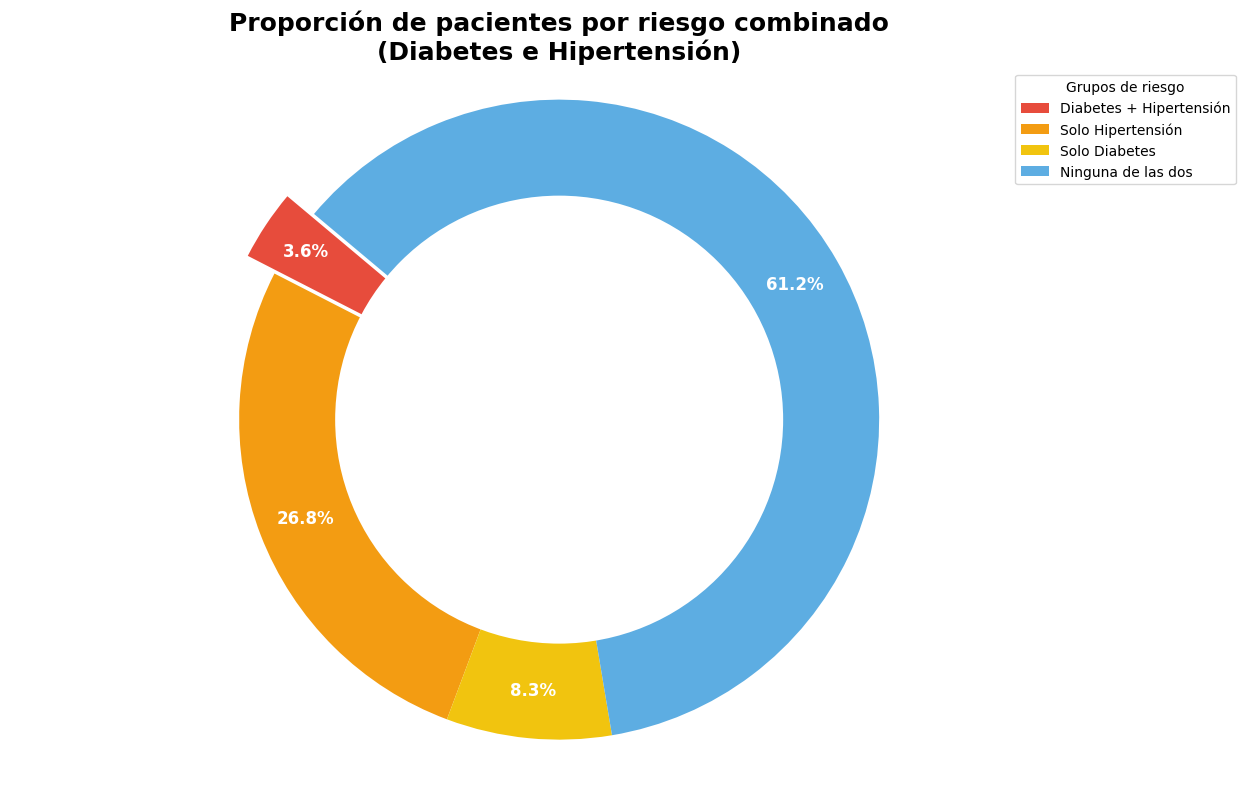


Proceso de generación de gráficos finalizado.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

nombre_archivo_csv = '../data/dataset_final.csv'

try:
    # leer CSV
    df = pd.read_csv(nombre_archivo_csv)
    print(f"Archivo '{nombre_archivo_csv}' cargado exitosamente.")
    print(f"El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{nombre_archivo_csv}'.")
    exit()


def clasificar_riesgo_combinado(row):
    es_diabetico = row['diabetes'] == 1
    es_hipertenso = row['hypertension'] == 1
    
    if es_diabetico and es_hipertenso:
        return 'Diabetes + Hipertensión'
    elif es_hipertenso:
        return 'Solo Hipertensión'
    elif es_diabetico:
        return 'Solo Diabetes'
    else:
        return 'Ninguna de las dos'

df['Grupo_Riesgo_Combinado'] = df.apply(clasificar_riesgo_combinado, axis=1)

#número de pacientes en cada categoría
conteo_riesgo = df['Grupo_Riesgo_Combinado'].value_counts()

print("\nGráfico de Pastel: Pacientes por grupos de riesgo...")

# orden y los colores para un mayor impacto visual
orden_grafico = ['Diabetes + Hipertensión', 'Solo Hipertensión', 'Solo Diabetes', 'Ninguna de las dos']
datos_ordenados = conteo_riesgo.reindex(orden_grafico)
colores = ['#E74C3C', '#F39C12', '#F1C40F', '#5DADE2'] 

#porción "explotar" o destacar. En este caso, la primera (Diabetes + Hipertensión).
explode = (0.1, 0, 0, 0) 

#gráfico de pastel
plt.figure(figsize=(12, 8))
plt.pie(
    datos_ordenados, 
    labels=datos_ordenados.index, 
    colors=colores,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    pctdistance=0.85,
    textprops={'fontsize': 12, 'color': 'white', 'weight': 'bold'}
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proporción de pacientes por riesgo combinado\n(Diabetes e Hipertensión)', fontsize=18, weight='bold')

plt.axis('equal')  

plt.legend(title="Grupos de riesgo", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()
